In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("NPStimeseries.csv")
df

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS
0,1000,US,01/09/2021,Krista Richards,9,3,10
1,1001,MEX,07/11/2021,Monica King,11,4,9
2,1002,UK,25/12/2021,Ricky Armstrong,12,4,0
3,1003,UK,01/10/2021,Andrea Foley,10,4,10
4,1004,UK,01/03/2021,Jerry Garcia,3,1,8
...,...,...,...,...,...,...,...
4995,5995,MEX,02/07/2021,Deborah Peterson,7,3,7
4996,5996,MEX,17/03/2021,Jordan Smith,3,1,10
4997,5997,UK,07/01/2021,Carly Scott,1,1,8
4998,5998,UK,14/10/2021,Eugene Burke,10,4,8


In [5]:
df.head()

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS
0,1000,US,01/09/2021,Krista Richards,9,3,10
1,1001,MEX,07/11/2021,Monica King,11,4,9
2,1002,UK,25/12/2021,Ricky Armstrong,12,4,0
3,1003,UK,01/10/2021,Andrea Foley,10,4,10
4,1004,UK,01/03/2021,Jerry Garcia,3,1,8


In [6]:
df.dtypes

ID                int64
Market           object
Survey date      object
Customer Name    object
Month             int64
Quarter           int64
NPS               int64
dtype: object

### Checking for missing values

In [7]:
df.isnull().sum()

ID               0
Market           0
Survey date      0
Customer Name    0
Month            0
Quarter          0
NPS              0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [ ]:
## No missing values in the dataset

### Duplicates

In [9]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool


### Id and customer name

In [10]:
df_new = df.iloc[:, [0,3]]
df_new

,ID,Customer Name
0,1000,Krista Richards
1,1001,Monica King
2,1002,Ricky Armstrong
3,1003,Andrea Foley
4,1004,Jerry Garcia
...,...,...
4995,5995,Deborah Peterson
4996,5996,Jordan Smith
4997,5997,Carly Scott
4998,5998,Eugene Burke


### Customer names and NPS

In [11]:
df_new = df.iloc[:, [3,6]]
df_new

,Customer Name,NPS
0,Krista Richards,10
1,Monica King,9
2,Ricky Armstrong,0
3,Andrea Foley,10
4,Jerry Garcia,8
...,...,...
4995,Deborah Peterson,7
4996,Jordan Smith,10
4997,Carly Scott,8
4998,Eugene Burke,8


### Maximum Nps rating

In [12]:
users= df['NPS'].value_counts()
users

NPS
10    1597
9      712
8      680
0      565
5      321
7      292
6      206
3      181
1      172
2      154
4      120
Name: count, dtype: int64

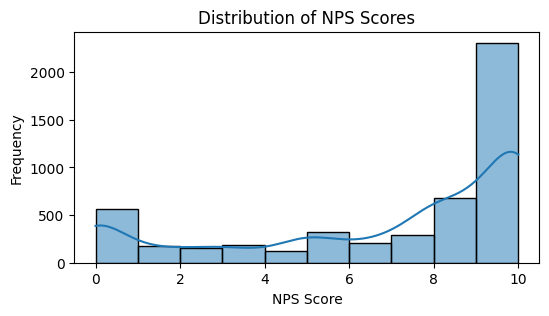

In [13]:
plt.figure(figsize=(6, 3))
sns.histplot(df['NPS'], bins=10, kde=True)
plt.title('Distribution of NPS Scores')
plt.xlabel('NPS Score')
plt.ylabel('Frequency')
plt.show()

### NPS score calculation

In [14]:
promoters = df[df['NPS'] >= 9].shape[0]
detractors = df[df['NPS'] <= 6].shape[0]
total_responses = df.shape[0]

nps = promoters / total_responses * 100 - detractors / total_responses * 100
print(f"Net Promoter Score (NPS): {nps:.2f}")

Net Promoter Score (NPS): 11.80


### Visualise the NPS categories(Promoters, Passives, Detractors) using a bar chart

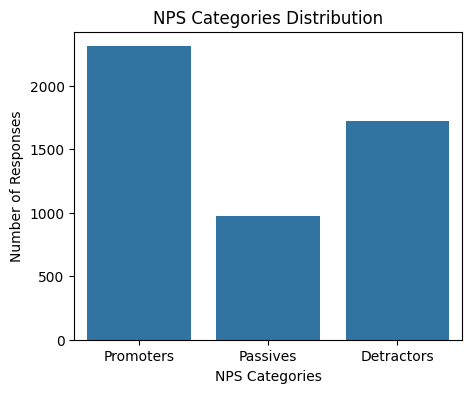

In [15]:
nps_categories = ['Promoters', 'Passives', 'Detractors']
nps_counts = [promoters, total_responses - promoters - detractors, detractors]

plt.figure(figsize=(5, 4))
sns.barplot(x=nps_categories, y=nps_counts)
plt.title('NPS Categories Distribution')
plt.xlabel('NPS Categories')
plt.ylabel('Number of Responses')
plt.show()

### Histogram

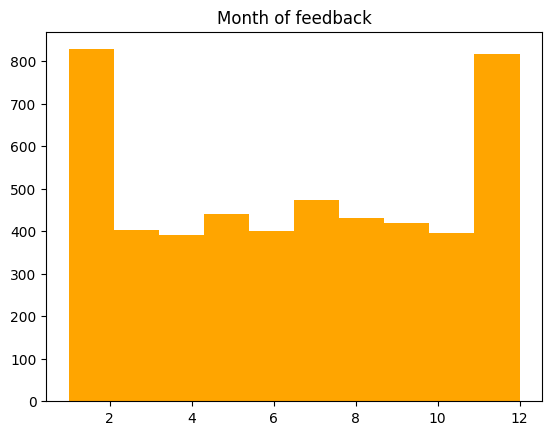

In [16]:
plt.hist(df['Month'], color ='orange')
plt.title("Month of feedback")
 
plt.show()

### Outlier estimation for NPS

In [18]:
percentile25 = df['NPS'].quantile(0.25)
percentile75 = df['NPS'].quantile(0.75)

In [19]:
percentile25

5.0

In [20]:
percentile75

10.0

In [21]:
iqr = percentile75 - percentile25
iqr

5.0

In [23]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [24]:
upper_limit

17.5

In [25]:
lower_limit

-2.5

### Detecting Outliers

In [26]:
df.describe()

,ID,Month,Quarter,NPS
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,3499.500000,6.496000,2.503000,6.84120
std,1443.520003,3.424899,1.108078,3.49228
min,1000.000000,1.000000,1.000000,0.00000
25%,2249.750000,4.000000,2.000000,5.00000
50%,3499.500000,7.000000,3.000000,8.00000
75%,4749.250000,9.000000,3.000000,10.00000
max,5999.000000,12.000000,4.000000,10.00000


In [27]:
df[df['NPS'] > upper_limit]

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS


In [28]:
df[df['NPS'] < lower_limit]

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS


In [ ]:
## No outliers found